<a href="https://colab.research.google.com/github/Pranjali-sambare/Fake-News-Detector/blob/main/News_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
uploaded = files.upload()

Saving FakeNewsNet.xlsx to FakeNewsNet.xlsx


In [4]:
df = pd.read_excel("FakeNewsNet.xlsx")
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [5]:
df.tail()

,title,news_url,source_domain,tweet_num,real
1998,"Kylie Jenner's Pregnancy ""Has Been Hell"" â€” S...",www.lifeandstylemag.com/posts/kylie-jenner-pre...,www.lifeandstylemag.com,4,0
1999,Where Caitlyn Jenner Stands with Every Woman i...,people.com/tv/where-caitlyn-jenner-stands-kard...,people.com,150,0
2000,Hollywood Reacts to Matt Lauerâ€™s Firing: â€˜...,variety.com/2017/tv/news/matt-lauer-fired-cele...,variety.com,21,0
2001,Celebrities react to Donald Trump's State of t...,abcnews.go.com/GMA/Culture/celebrities-react-d...,abcnews.go.com,28,0
2002,Can a blind person see again through an eye su...,www.quora.com/Can-a-blind-person-see-again-thr...,www.quora.com,1020,0


In [6]:
df.shape

(2003, 5)

In [7]:
df.columns

Index(['title', 'news_url', 'source_domain', 'tweet_num', 'real'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2003 non-null   object
 1   news_url       1966 non-null   object
 2   source_domain  1966 non-null   object
 3   tweet_num      2003 non-null   int64 
 4   real           2003 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 78.4+ KB


In [9]:
df.describe()

,tweet_num,real
count,2003.000000,2003.000000
mean,80.913130,0.748377
std,350.269299,0.434054
min,0.000000,0.000000
25%,10.000000,0.000000
50%,35.000000,1.000000
75%,63.000000,1.000000
max,10166.000000,1.000000


In [10]:
df.isnull().sum()

,0
title,0
news_url,37
source_domain,37
tweet_num,0
real,0


In [11]:
df = df.dropna()

In [12]:
df["real"].unique()

array([1, 0])

In [13]:
p = df['real'] = df['real'].fillna(df['real'].mean())
print(p)

0       1
1       1
2       1
3       1
4       1
       ..
1998    0
1999    0
2000    0
2001    0
2002    0
Name: real, Length: 1966, dtype: int64


In [14]:
df.duplicated().sum()

1

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

Data Visualisation

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

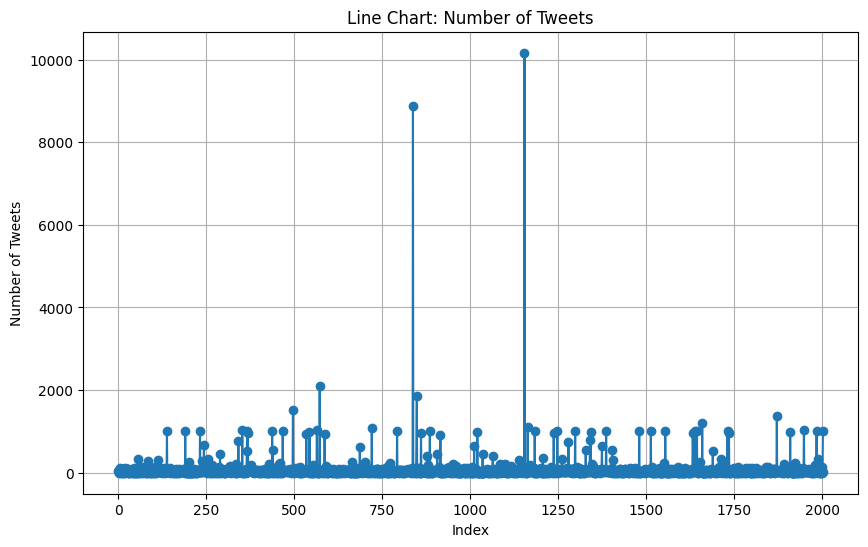

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df['tweet_num'], marker='o')
plt.title('Line Chart: Number of Tweets')
plt.xlabel('Index')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

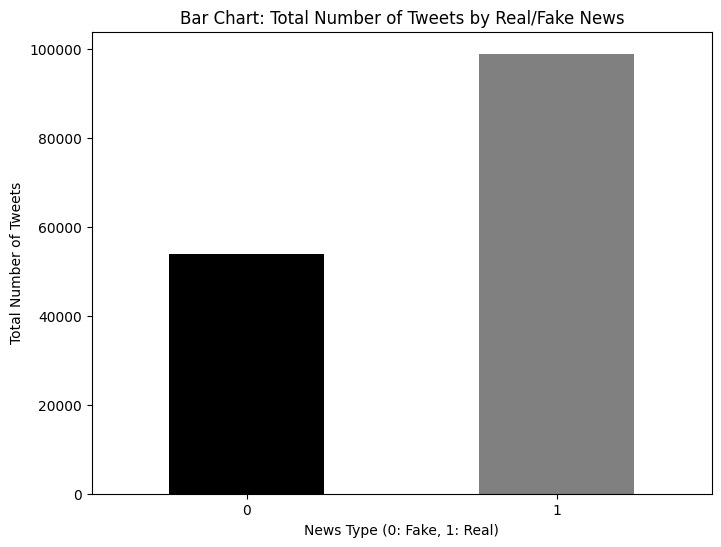

In [21]:
# Bar Chart
tweet_sum_by_real = df.groupby('real')['tweet_num'].sum()

plt.figure(figsize=(8, 6))
tweet_sum_by_real.plot(kind='bar', color=['Black', 'Grey'])
plt.title('Bar Chart: Total Number of Tweets by Real/Fake News')
plt.xlabel('News Type (0: Fake, 1: Real)')
plt.ylabel('Total Number of Tweets')
plt.xticks(rotation=0)
plt.show()

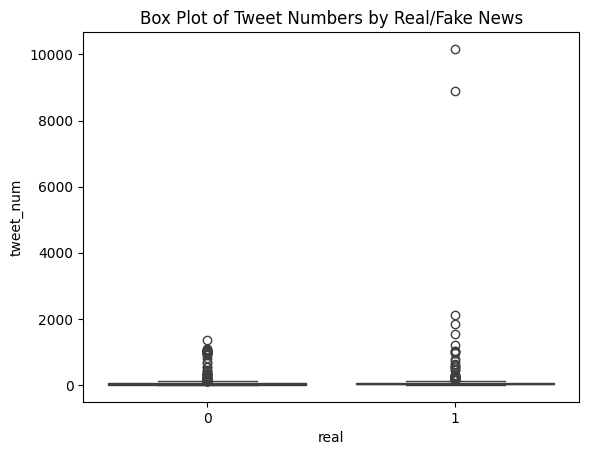

In [25]:
sns.boxplot(x='real', y='tweet_num', data=df)
plt.title('Box Plot of Tweet Numbers by Real/Fake News')
plt.show()

Logistic Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [28]:
X = df[['tweet_num']]
y = df['real']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [34]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.752542372881356
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.75      1.00      0.86       445

    accuracy                           0.75       590
   macro avg       0.38      0.50      0.43       590
weighted avg       0.57      0.75      0.65       590

